In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib

In [4]:
df = pd.read_excel('/content/Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df_furniture = df.loc[df['Category'] == 'Furniture']
df_furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [7]:
df_furniture.drop(cols, axis=1, inplace=True)
df_furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [8]:
df_furniture = df_furniture.set_index('Order Date')

In [9]:
df_furniture.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [10]:
df_furniture.shape

(2121, 1)

In [11]:
plt.figure(figsize=(60,40))
plt.plot(df_furniture.index, df_furniture['Sales'], marker='o', linestyle = '-')
plt.title('Sales plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
y = df_furniture['Sales'].resample('MS').mean()

In [13]:
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

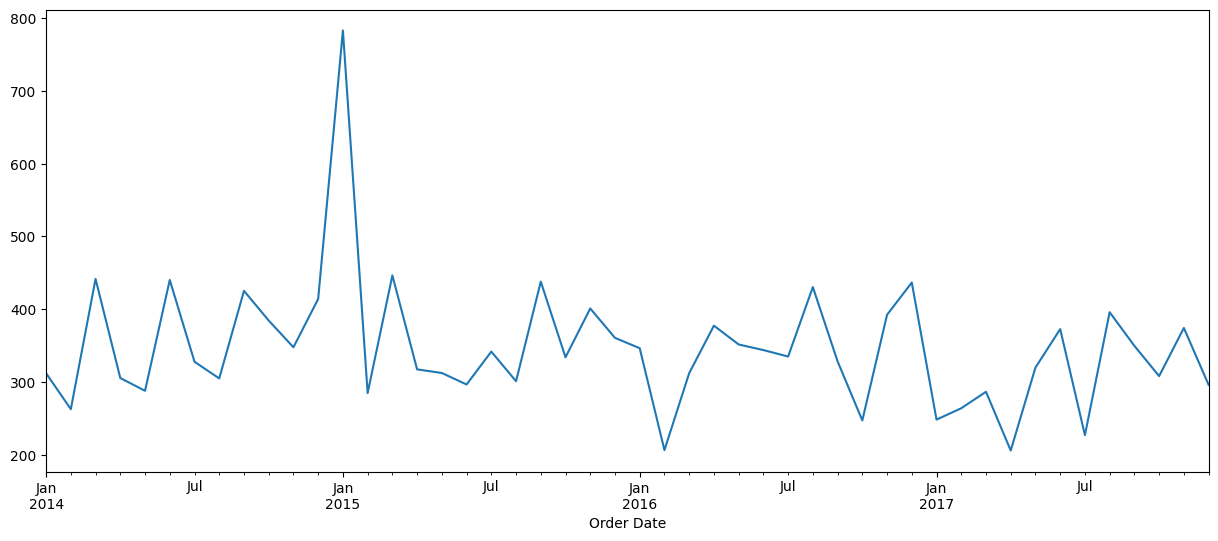

In [14]:
y.plot(figsize=(15,6))
plt.show()

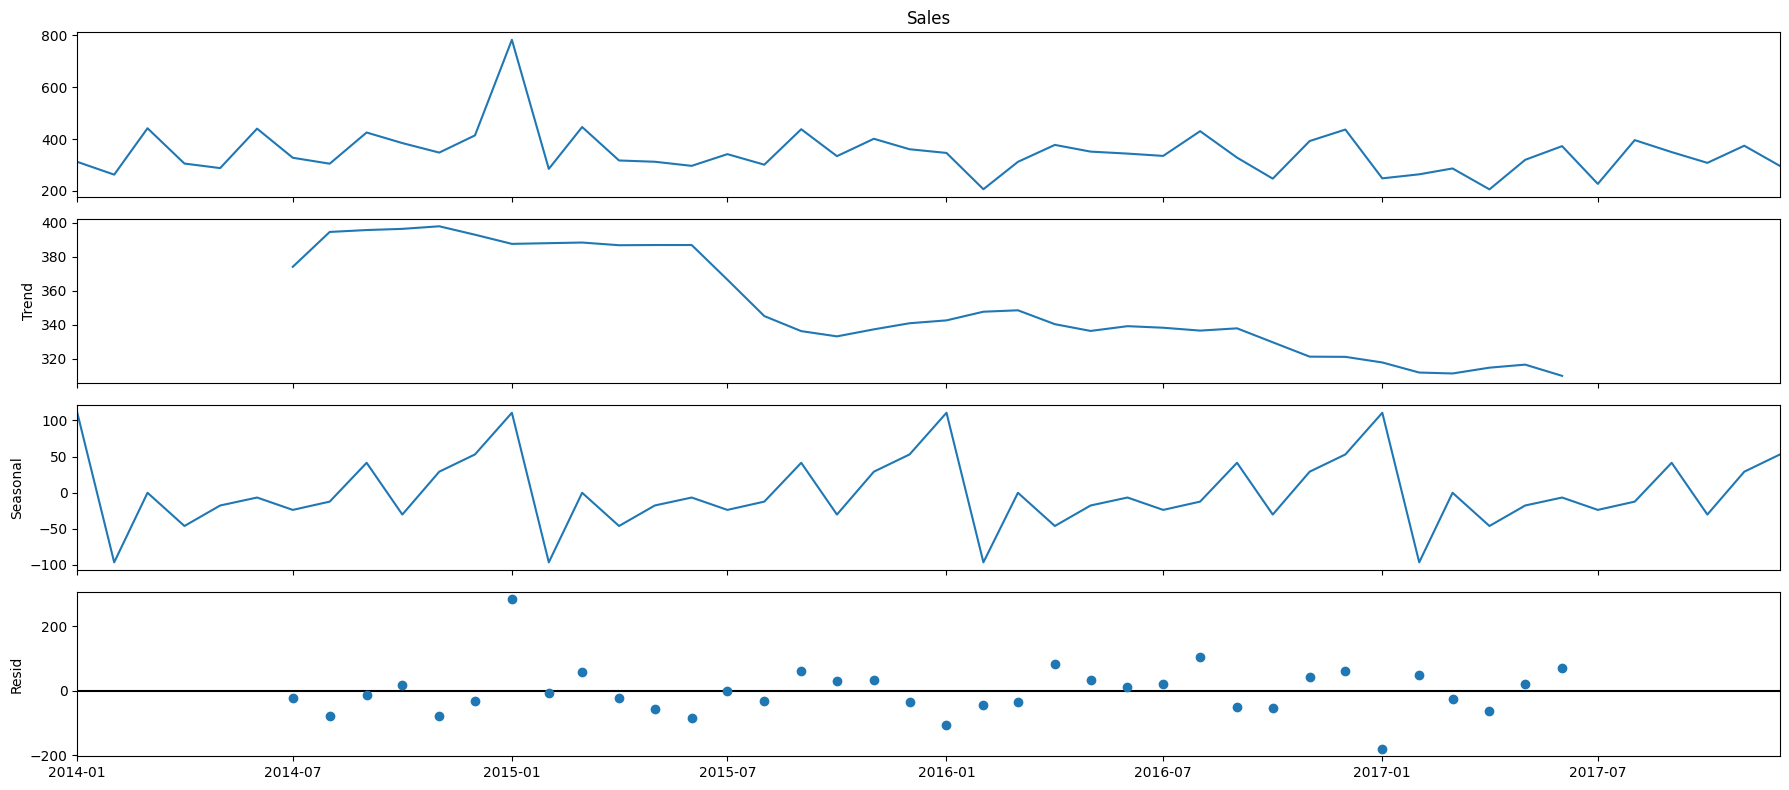

In [15]:
#Visualizing data with time-series decomposition method

from pylab import rcParams

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
#The sales data is unstable

In [17]:
p = d = q = range(0,2)

pdq = list(itertools.product(p,q,d))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,q,d))]

print('Example of parameter combinations for seasonal ARIMA')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 0, 1) X (0, 1, 1, 12)
SARIMAX: (0, 0, 1) X (1, 0, 0, 12)


In [18]:
#Calculating AIC (Akaike Information Criterion)
'''
measure used to compare the goodness of fit of statistical models, particularly in the context of time series analysis with ARIMA (AutoRegressive Integrated Moving Average) models.
It helps to balance the trade-off between the complexity of the model and how well it fits the data.
The AIC value is used to select the best model among a set of possible models by penalizing models with more parameters to avoid overfitting.

AIC = 2k - 2ln(L)
k = number of parameters in model
L = Max value of the likelihood function of the model

Lower Value indicates a better-fitting model.

'''

'\nmeasure used to compare the goodness of fit of statistical models, particularly in the context of time series analysis with ARIMA (AutoRegressive Integrated Moving Average) models. \nIt helps to balance the trade-off between the complexity of the model and how well it fits the data. \nThe AIC value is used to select the best model among a set of possible models by penalizing models with more parameters to avoid overfitting.\n\nAIC = 2k - 2ln(L)\nk = number of parameters in model\nL = Max value of the likelihood function of the model\n\nLower Value indicates a better-fitting model.\n\n'

In [19]:
aic = []
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order=param_seasonal,
                                      enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}X{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      aic.append(results.aic)
    except:
      continue


ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:1611.0922033735553
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:426.2046489859171
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:272.09198476282904
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:1325.7043223984153
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:295.44645647223496
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:274.09198456327755
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:641.1240680665886
ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:2641.73659434863
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:416.549645336461
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:262.52305170476995
ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:455.14321938664324
ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:2597.985428248429
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:297.446406625019
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:264.52300131281385
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:580.638926970597
ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:1575.444476970495
ARIMA(

In [20]:
aic

[688.3112416991725,
 1611.0922033735553,
 426.2046489859171,
 272.09198476282904,
 452.8238602501691,
 1325.7043223984153,
 295.44645647223496,
 274.09198456327755,
 641.1240680665886,
 2641.73659434863,
 416.549645336461,
 262.52305170476995,
 455.14321938664324,
 2597.985428248429,
 297.446406625019,
 264.52300131281385,
 580.638926970597,
 1575.444476970495,
 433.3552136704604,
 274.10692957468103,
 437.46040107889746,
 1356.693430641829,
 294.1158452476944,
 276.10533141664445,
 538.8964721447168,
 2077.084300376492,
 412.87269899052046,
 251.24707755083693,
 419.1839792724929,
 1418.3249112244534,
 273.40324546363354,
 253.2196476461961,
 592.7661498749849,
 1226.1480863563586,
 427.72411597383274,
 273.5820684371147,
 420.41145389920365,
 1398.0098441825478,
 273.5840395565937,
 275.5784303961337,
 553.2719417804883,
 1603.310902605729,
 418.52617830891495,
 263.8216777113438,
 422.40035833225227,
 1917.905140545859,
 275.47757405308084,
 265.8212105873125,
 566.5211872508684,
 1

In [21]:
max = 100000
for i in aic:
  if i < max:
    max = i
print(max)

238.90990924728402


In [22]:
#Optimal parameters : ARIMA(1, 1, 1)X(1, 0, 1, 12)12

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = (1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


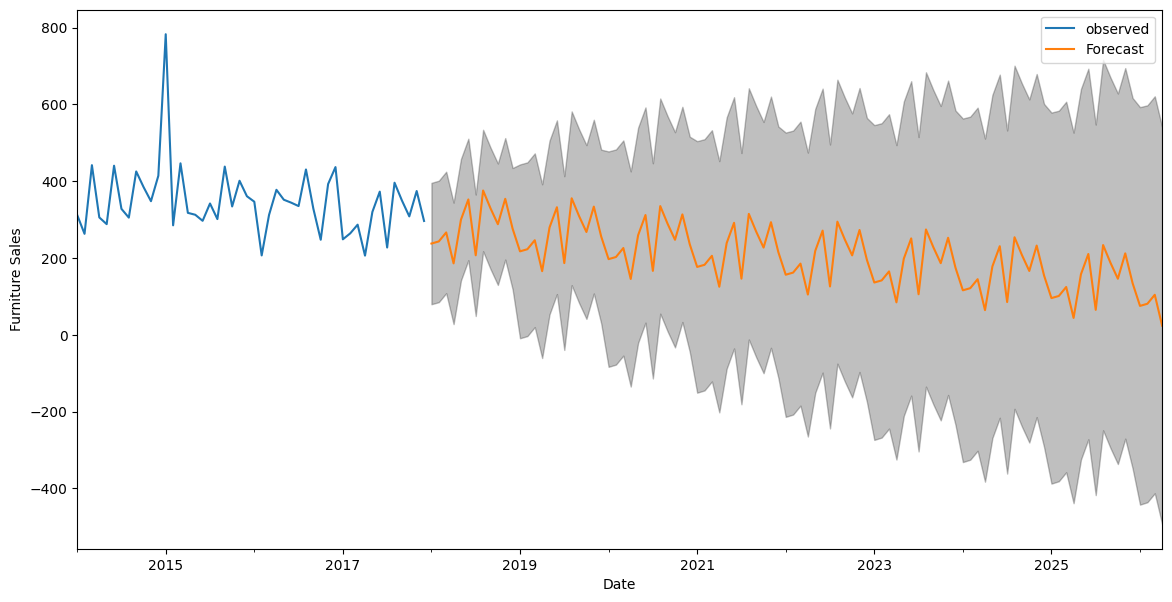

In [41]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [27]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(WPI):
  result = adfuller(WPI)
  lables = ['ADF Test stats', 'p-value', 'lags used', 'no of obs used']
  for value, label in zip(result, lables):
    print(label + ':' + str(value))
  if result[1] <= 0.05:
    print('Data is stationary')
  else:
    print('data is not stationary')

In [28]:
adfuller_test(y)

ADF Test stats:-6.962405221214861
p-value:9.093398510006677e-10
lags used:0
no of obs used:47
Data is stationary


In [29]:
adfuller_test(df_furniture)

ADF Test stats:-23.77818891185227
p-value:0.0
lags used:2
no of obs used:2118
Data is stationary


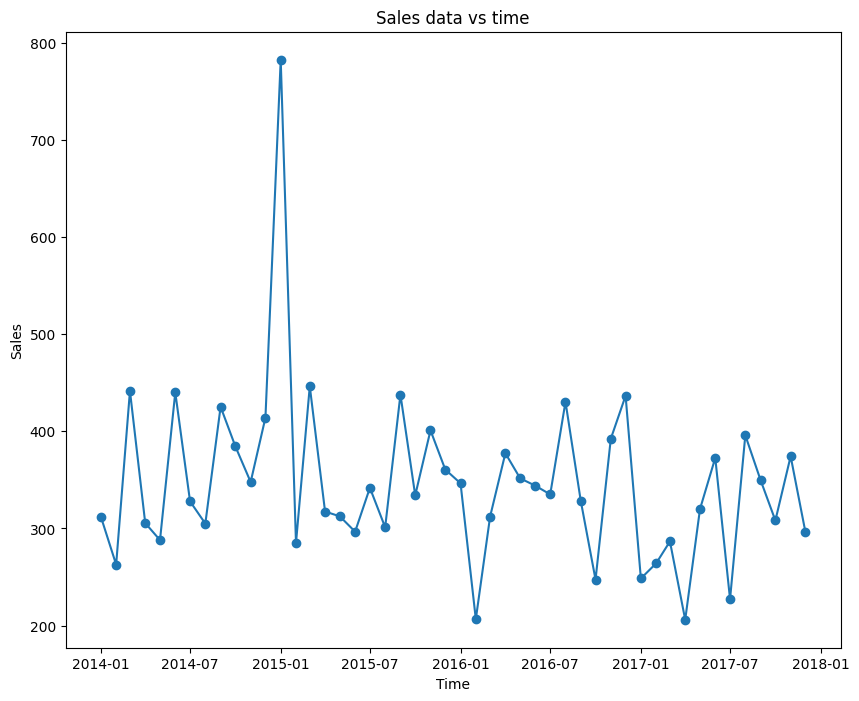

In [32]:
plt.figure(figsize = (10,8))
plt.plot(y.index, y, marker = 'o', linestyle = '-')
plt.title('Sales data vs time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Optimal parameters : ARIMA(1, 1, 1)X(1, 0, 1, 12)12

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y, order = (1,1,1), seasonal_order=(1,0,1,12))
results = model.fit()